## Summary Plots
This notebook contains summary plots of the synthetic population error by tract and the transect error

The formulas that underly all of our analysis comparing synthetic to ACS populations are the following:

error:  
$\delta = T - E$  
where $T =$ synthetic population value and $E =$ ACS estimate

error - margin of error:  
$\delta E = |\delta| - MoE$

total absolute error:  
$TAE_z = \sum_{i=1}^n \begin{vmatrix} T_i - E_i \end{vmatrix} $

percent error:  
$CE_z = \frac {TAE_z}{N_z}$

total error - total margin of error:   
$\Delta E_z = TAE_z - TMoE_z$       where $TMoE_z = \sum_{i=1}^n MoE_i$

percent difference between total error and margin of error:  
$ \% \Delta E_z = \frac {\Delta E_z}{TMoE_z}$

In [ ]:
#reading in libraries and data

In [205]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style 
import seaborn as sns
pd.options.display.max_columns = 40
plt.style.use('seaborn-white')
from functools import reduce
synthetic_people_households = pd.read_csv("data_outputs/20190408_ACS_SyntheticsForGIS/37119_people_households_var_tract.csv")

### Plotting tract-wise difference between synthetic and acs populations

#### Person-level synthetics:
In the plots below we see that a large proportion of tracts have $\delta$ values that are greater than the ACS MoE for the tract. 

This is however not the case for the imputed variable of women over 60. We should choose a different imputed variable. 

/Users/darebrawley/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/darebrawley/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


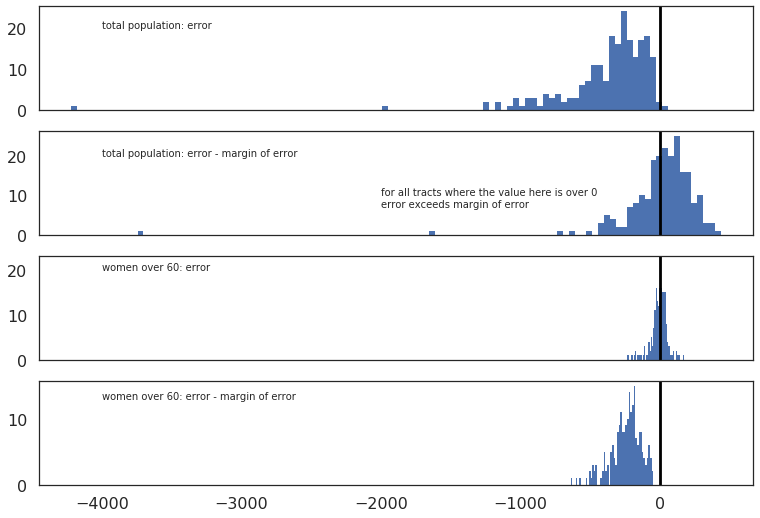

In [99]:
fig, axs = plt.subplots(4, 1, sharex=True)
# fig.subplots_adjust(hspace=0)

axs[0].hist(synthetic_people_households["d_total"],bins=100)
axs[0].text(-4000,20,'total population: error')
axs[1].hist(synthetic_people_households["d_tot_ae_me"],bins=100)
axs[1].text(-4000,20,'total population: error - margin of error')
axs[1].text(-2000,10,'for all tracts where the value here is over 0')
axs[1].text(-2000,7,'error exceeds margin of error')
axs[2].hist(synthetic_people_households["d_women60"],bins=50)
axs[2].text(-4000,20, 'women over 60: error')
axs[3].hist(synthetic_people_households["d_women60_ae_me"], bins=50)
axs[3].text(-4000,13, 'women over 60: error - margin of error')

axs[0].axvline(x=0)
axs[1].axvline(x=0)
axs[2].axvline(x=0)
axs[3].axvline(x=0)
# fig.figure(figsize=(12, 14)) 
# fig.style.use('seaborn-poster')

plt.show()

#### Household-level synthetics: 
The synthetic housholds have very small errors that are all within ACS margin of error.  

This is due to the way in which the SynthPop algorithm works using an iterative proportional alrogithm to achieve the best fit between household and person-level synthetics. But it uses the household level as the baseline.

/Users/darebrawley/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/darebrawley/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


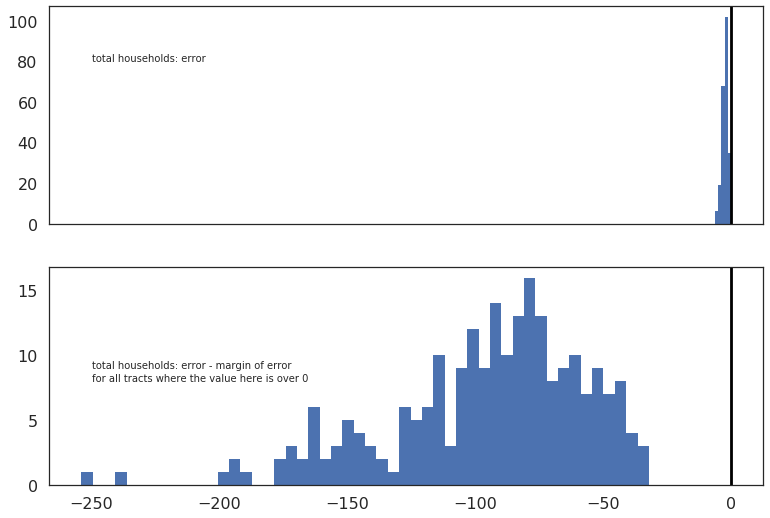

In [167]:
fig, axs = plt.subplots(2, 1, sharex=True)
# fig.subplots_adjust(hspace=0)

axs[0].hist(synthetic_people_households["d_totalhh"],bins=5)
axs[0].text(-250,80,'total households: error')
axs[1].hist(synthetic_people_households["d_tothh_ae_me"],bins=50)
axs[1].text(-250,9,'total households: error - margin of error')
axs[1].text(-250,8,'for all tracts where the value here is over 0')
# axs[1].text(-2000,7,'error exceeds margin of error')

axs[0].axvline(x=0)
axs[1].axvline(x=0)
# fig.figure(figsize=(12, 14)) 
# fig.style.use('seaborn-poster')

plt.show()

### Transect analysis summaries

In [168]:
# loading transect data
transect_results = pd.read_csv("data_inputs/transect_error_results.csv")

In [170]:
# calculating 
transect_results['CE_pop'] = transect_results["d_abs_tot"]/transect_results["total"]

In [171]:
transect_results.head()

,FID,Join_Count,TARGET_FID,OBJECTID,Id,gridcode,Shape_Leng,Shape_Area,geoidd,women_60,women_60_m,total,total_me,s_total,s_women60,d_total,d_tot_ae_m,d_women60,d_women60_,d_abs_tot,d_abs_wome,tothh,tothh_me,s_tothh,d_totalhh,d_tothh_ae,d_abs_toth,ORIG_FID,dE_pop,per_dE_pop,CE_pop
0,0,6,0,1,1,3,95914.424106,3.060937e+08,3.711901e+10,2128,1953,29353,1934,28469.0,2167.0,-884.0,1050.0,39.0,1782.0,884.0,171.0,11713,689,11701.0,-12.0,-677.0,12.0,0,-1050.0,-0.542916,0.030116
1,1,3,1,2,2,3,37158.028149,6.897116e+07,3.711901e+10,820,628,8650,685,8479.0,723.0,-171.0,514.0,-97.0,531.0,171.0,97.0,3299,200,3297.0,-2.0,-198.0,2.0,78,-514.0,-0.750365,0.019769
2,2,1,2,3,3,6,40243.995108,9.388622e+07,3.711901e+10,285,333,5007,520,4186.0,265.0,-821.0,-301.0,-20.0,313.0,821.0,20.0,2462,195,2459.0,-3.0,-192.0,3.0,169,301.0,0.578846,0.163970
3,3,1,3,4,4,6,27396.483492,3.505387e+07,3.711901e+10,25,86,3884,435,2731.0,62.0,-1153.0,-718.0,37.0,49.0,1153.0,37.0,1098,96,1098.0,0.0,-96.0,0.0,119,718.0,1.650575,0.296859
4,4,14,9,10,10,3,256712.554397,8.208278e+08,3.711901e+10,4925,4021,74747,7026,56360.0,4124.0,-8625.0,-2753.0,176.0,2985.0,8625.0,368.0,27607,1564,27572.0,-35.0,-1529.0,35.0,2,1599.0,0.227583,0.115389


### Plotting error by transect zone

We see below that Zone 6 has the highest error normalized by overall population. Also the difference between the aggregate ACS margin of error for zone 6 and the synthetic error is greater than zero for all zone 6 areas, meaning that the synthetic error is greater than the margin of error for these zones. 



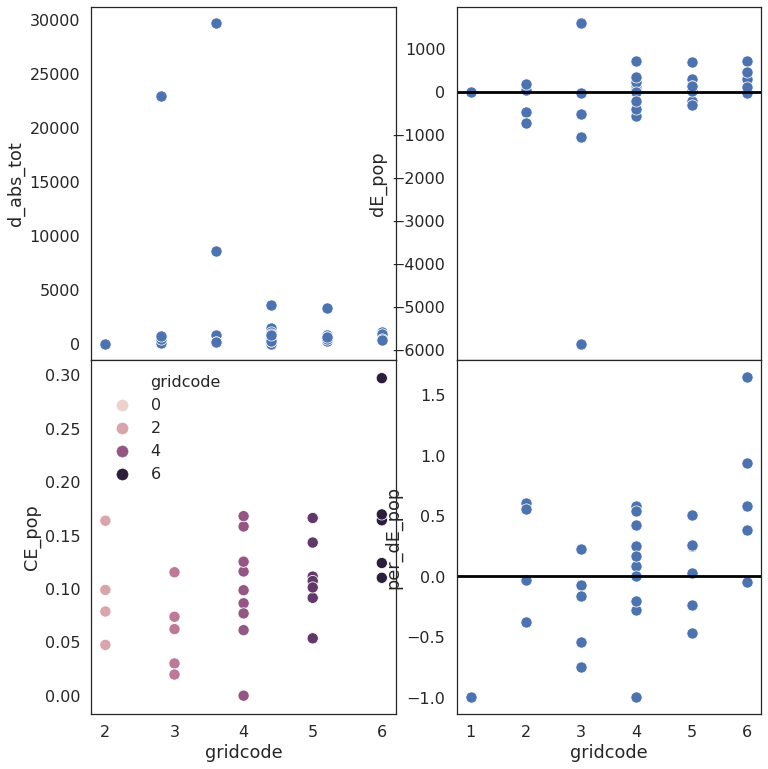

In [172]:
f, axes = plt.subplots(2,2, figsize=(12,13))
f.subplots_adjust(hspace=0)
sns.scatterplot(x="gridcode",y="CE_pop", data=transect_results, ax=axes[1,0],hue="gridcode")
sns.scatterplot(x="gridcode",y="d_abs_tot", data=transect_results, ax=axes[0,0])
sns.scatterplot(x="gridcode",y="dE_pop", data=transect_results, ax=axes[0,1])
sns.scatterplot(x="gridcode",y="per_dE_pop", data=transect_results, ax=axes[1,1])
axes[0,1].axhline(y=0)
axes[1,1].axhline(y=0);

### Summarizing transect results:

In [231]:
#summarizing by mean, min, max for each transect zone
zone_groups = transect_results.groupby('gridcode').mean().drop(columns=['FID', 'Join_Count', 'TARGET_FID', 'OBJECTID', 'Id', 'Shape_Leng',
       'Shape_Area', 'geoidd', 'women_60', 'women_60_m', 'total', 'total_me',
       's_total', 's_women60', 'd_total', 'd_tot_ae_m', 'd_women60',
       'd_women60_', 'd_abs_wome', 'tothh', 'tothh_me', 's_tothh',
       'd_totalhh', 'd_tothh_ae', 'd_abs_toth', 'ORIG_FID',])
zone_groupsmin = transect_results.groupby('gridcode').min().drop(columns=['FID', 'Join_Count', 'TARGET_FID', 'OBJECTID', 'Id', 'Shape_Leng',
       'Shape_Area', 'geoidd', 'women_60', 'women_60_m', 'total', 'total_me',
       's_total', 's_women60', 'd_total', 'd_tot_ae_m', 'd_women60',
       'd_women60_', 'd_abs_wome', 'tothh', 'tothh_me', 's_tothh',
       'd_totalhh', 'd_tothh_ae', 'd_abs_toth', 'ORIG_FID',])
zone_groupsmax = transect_results.groupby('gridcode').max().drop(columns=['FID', 'Join_Count', 'TARGET_FID', 'OBJECTID', 'Id', 'Shape_Leng',
       'Shape_Area', 'geoidd', 'women_60', 'women_60_m', 'total', 'total_me',
       's_total', 's_women60', 'd_total', 'd_tot_ae_m', 'd_women60',
       'd_women60_', 'd_abs_wome', 'tothh', 'tothh_me', 's_tothh',
       'd_totalhh', 'd_tothh_ae', 'd_abs_toth', 'ORIG_FID',])
#adding column prefix
zone_groupsmax.columns = ['max_' + str(col) for col in zone_groupsmax.columns]
zone_groupsmin.columns = ['min_' + str(col) for col in zone_groupsmin.columns]
zone_groups.columns = ['mean_' + str(col) for col in zone_groups.columns]

#merging 
summary = [zone_groups, zone_groupsmin, zone_groupsmax]
summary_zones = reduce(lambda left,right: pd.merge(left,right,on="gridcode"),summary)

#reordering columns
colOrder = ['mean_d_abs_tot', 'min_d_abs_tot','max_d_abs_tot', 
            'mean_CE_pop','min_CE_pop','max_CE_pop',
      'mean_dE_pop',  'min_dE_pop', 'max_dE_pop',
 'mean_per_dE_pop',  'min_per_dE_pop','max_per_dE_pop']

summary_zones = summary_zones[colOrder]

In [240]:
# Summary dataframe
summary_zones.round(3).transpose()

gridcode,1,2,3,4,5,6
mean_d_abs_tot,0.0,6107.250,7932.000,945.900,988.714,765.200
min_d_abs_tot,0.0,133.000,171.000,0.000,333.000,411.000
max_d_abs_tot,0.0,23017.000,29736.000,3617.000,3327.000,1153.000
mean_CE_pop,NaN,0.097,0.060,0.102,0.111,0.173
min_CE_pop,NaN,0.047,0.020,0.000,0.054,0.110
max_CE_pop,NaN,0.164,0.115,0.168,0.166,0.297
mean_dE_pop,-12.0,-246.500,-1171.800,32.300,106.000,312.800
min_dE_pop,-12.0,-739.000,-5875.000,-566.000,-298.000,-25.000
max_dE_pop,-12.0,177.000,1599.000,715.000,688.000,718.000
mean_per_dE_pop,-1.0,0.189,-0.261,0.057,0.085,0.700


### Transect Summary:
Some notes interpreting the table summarizing transect analysis above:

To clarify the variable names are:  
$TAE_z$ = d_abs_tot

$CE_z$ = CE_pop

$\Delta E_z$ = dE_pop

$ \% \Delta E_z$ = per_dE_pop


We see that for zone 6 the mean percent error ($CE_z$) is 17%, and the maximum percent error is 29% 

And similarly mean percent difference between error and margin of error ($ \% \Delta E_z$) is 70%

These represent a great degree of error and uncertainty in the synthetic populations. 